<a href="https://colab.research.google.com/github/John-Z-byte/Evaluating-January-Patient-Financial-Burden/blob/main/Evaluating_January_Patient_Financial_Burden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Landing_2025.xlsx to Landing_2025.xlsx


In [3]:
df = pd.read_excel('Landing_2025.xlsx')

print(df.head())

print(df.info())




         PATIENT NAME                     MRN        DOB      NUMBER  \
0   Kraft ,  Dennis S  dGoSOLqiJU69hnXtUFexfw 2005-07-09  4329782030   
1   Kraft ,  Dennis S  dGoSOLqiJU69hnXtUFexfw 2005-07-09  4329782030   
2      Wulff ,  Colin  Kru__863RkSqImKEnluZ0A 2002-05-03  5613020045   
3      Wulff ,  Colin  Kru__863RkSqImKEnluZ0A 2002-05-03  5613020045   
4  Kover ,  Christine  XziPZmKohk-XKAoxmFEPKA 1974-06-30  2344306740   

  DATE ADDED  PATIENT RESPONSIBILITY     TIER INSURENCE COMPANY  \
0 2025-01-22                   35.02   TIER 1              BCBS   
1 2025-01-22                   35.02   TIER 1              BCBS   
2 2025-01-22                    0.00   TIER 1             Cigna   
3 2025-01-22                    0.00   TIER 1             Cigna   
4 2025-01-22                    0.00   TIER 1            Humana   

                    TYPE  
0  Home Sleep Test (HST)  
1  Home Sleep Test (HST)  
2  Home Sleep Test (HST)  
3  Home Sleep Test (HST)  
4  Home Sleep Test (HST)  
<c

In [4]:
df['PATIENT RESPONSIBILITY'] = df['PATIENT RESPONSIBILITY'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [5]:
# Strip any leading/trailing whitespace from the 'TIER' column to ensure consistent formatting
df['TIER'] = df['TIER'].str.strip()

# Now group by 'TIER' and calculate total and average out-of-pocket revenue
tier_summary = df.groupby('TIER')['PATIENT RESPONSIBILITY'].agg(['sum', 'mean']).reset_index()

# Renaming the columns for better clarity
tier_summary.columns = ['TIER', 'Total Out-of-Pocket Revenue', 'Average Out-of-Pocket Revenue']

# Displaying the result
print(tier_summary)



     TIER  Total Out-of-Pocket Revenue  Average Out-of-Pocket Revenue
0  TIER 1                     75849.52                      14.381782
1  TIER 2                   1020628.13                     153.178468
2  TIER 3                   1977064.07                     304.773250


In [6]:
# Grouping by 'INSURENCE COMPANY' and calculating total and average patient responsibility (out-of-pocket)
insurance_summary = df.groupby('INSURENCE COMPANY')['PATIENT RESPONSIBILITY'].agg(['sum', 'mean']).reset_index()

# Renaming columns for clarity
insurance_summary.columns = ['INSURENCE COMPANY', 'Total Out-of-Pocket Revenue', 'Average Out-of-Pocket Revenue']

# Displaying the result
print(insurance_summary)


      INSURENCE COMPANY  Total Out-of-Pocket Revenue  \
0    90 Degree Benefits                      1066.01   
1     AHCCCS Mercy Care                         0.00   
2                  APWU                       418.60   
3            ASR Health                       171.01   
4                 Aetna                    100359.51   
..                  ...                          ...   
146      Veterans Admin                         0.00   
147             Web TPA                      2641.74   
148            Wellcare                      1530.00   
149             Wellnet                       290.00   
150    Zelis Healthcare                       145.00   

     Average Out-of-Pocket Revenue  
0                       152.287143  
1                         0.000000  
2                       209.300000  
3                       171.010000  
4                       134.710752  
..                             ...  
146                       0.000000  
147                     146.763

In [7]:
# Converting DOB to datetime format (if necessary)
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Calculating Age
df['Age'] = (pd.to_datetime('today') - df['DOB']).dt.days // 365

# Display the first few rows to check the 'Age' column
print(df[['PATIENT NAME', 'DOB', 'Age']].head())


         PATIENT NAME        DOB  Age
0   Kraft ,  Dennis S 2005-07-09   19
1   Kraft ,  Dennis S 2005-07-09   19
2      Wulff ,  Colin 2002-05-03   22
3      Wulff ,  Colin 2002-05-03   22
4  Kover ,  Christine 1974-06-30   50


     TIER         sum        mean
0  TIER 1    75849.52   14.381782
1  TIER 2  1020628.13  153.178468
2  TIER 3  1977064.07  304.773250


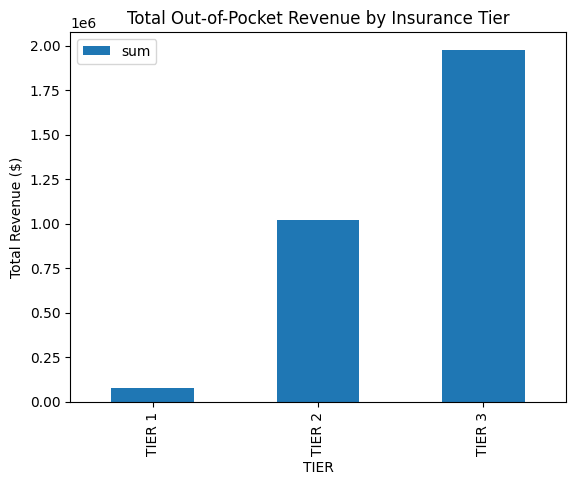

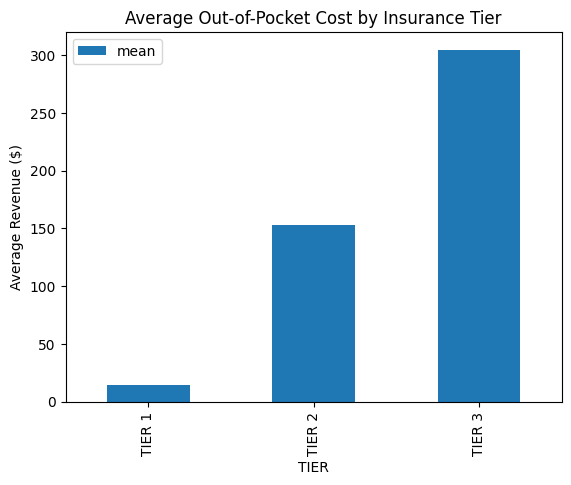

In [8]:
# Group by 'TIER' and calculate total and average out-of-pocket responsibility
tier_summary = df.groupby('TIER')['PATIENT RESPONSIBILITY'].agg(['sum', 'mean']).reset_index()

# Display the results
print(tier_summary)

# Optional: Visualize the data using bar chart
import matplotlib.pyplot as plt
tier_summary.plot(x='TIER', y='sum', kind='bar', title='Total Out-of-Pocket Revenue by Insurance Tier')
plt.ylabel('Total Revenue ($)')
plt.show()

tier_summary.plot(x='TIER', y='mean', kind='bar', title='Average Out-of-Pocket Cost by Insurance Tier')
plt.ylabel('Average Revenue ($)')
plt.show()


In [9]:
# Group by 'INSURENCE COMPANY' and calculate total and average out-of-pocket responsibility
insurance_summary = df.groupby('INSURENCE COMPANY')['PATIENT RESPONSIBILITY'].agg(['sum', 'mean']).reset_index()

# Renaming columns for clarity
insurance_summary.columns = ['Insurance Company', 'Total Out-of-Pocket Revenue', 'Average Out-of-Pocket Revenue']

# Display the result
print(insurance_summary)


      Insurance Company  Total Out-of-Pocket Revenue  \
0    90 Degree Benefits                      1066.01   
1     AHCCCS Mercy Care                         0.00   
2                  APWU                       418.60   
3            ASR Health                       171.01   
4                 Aetna                    100359.51   
..                  ...                          ...   
146      Veterans Admin                         0.00   
147             Web TPA                      2641.74   
148            Wellcare                      1530.00   
149             Wellnet                       290.00   
150    Zelis Healthcare                       145.00   

     Average Out-of-Pocket Revenue  
0                       152.287143  
1                         0.000000  
2                       209.300000  
3                       171.010000  
4                       134.710752  
..                             ...  
146                       0.000000  
147                     146.763

In [13]:
# Convert DOB to age
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')  # Convert DOB to datetime
df['Age'] = (pd.to_datetime('today') - df['DOB']).dt.days // 365  # Calculate age in years

# Create age groups
bins = [18, 30, 50, 70, 100]
labels = ['18-30', '31-50', '51-70', '71+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate total and average out-of-pocket costs
age_summary = df.groupby('Age Group')['PATIENT RESPONSIBILITY'].agg(['sum', 'mean']).reset_index()

# Renaming columns for clarity
age_summary.columns = ['Age Group', 'Total Out-of-Pocket Revenue', 'Average Out-of-Pocket Revenue']

# Display the result
print(age_summary)

# Correlation between age and out-of-pocket cost
correlation = df['Age'].corr(df['PATIENT RESPONSIBILITY'])
print(f"Correlation between age and out-of-pocket cost: {correlation}")


  Age Group  Total Out-of-Pocket Revenue  Average Out-of-Pocket Revenue
0     18-30                    239838.24                     195.786318
1     31-50                   1185169.26                     192.585190
2     51-70                   1306566.74                     167.251247
3       71+                    321579.84                     101.797987
Correlation between age and out-of-pocket cost: -0.2632948567843464


<ipython-input-13-386e6236bc5e>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_summary = df.groupby('Age Group')['PATIENT RESPONSIBILITY'].agg(['sum', 'mean']).reset_index()


In [11]:
# Correctly filter out self-pay patients by including the space after 'Self Pay'
self_pay_patients = df[df['INSURENCE COMPANY'].str.contains('Self Pay', case=False, na=False)]

# Calculate total out-of-pocket revenue for self-pay patients
total_self_pay_revenue = self_pay_patients['PATIENT RESPONSIBILITY'].sum()

# Calculate total out-of-pocket revenue for all patients
total_out_of_pocket_revenue = df['PATIENT RESPONSIBILITY'].sum()

# Calculate the percentage of self-pay revenue
self_pay_percentage = (total_self_pay_revenue / total_out_of_pocket_revenue) * 100

print(f"Total Self-Pay Revenue: ${total_self_pay_revenue}")
print(f"Total Out-of-Pocket Revenue: ${total_out_of_pocket_revenue}")
print(f"Self-Pay Revenue Percentage: {self_pay_percentage:.2f}%")


Total Self-Pay Revenue: $1635009.0
Total Out-of-Pocket Revenue: $3073541.7199999997
Self-Pay Revenue Percentage: 53.20%


In [14]:
tier_summary = df.groupby('TIER')['PATIENT RESPONSIBILITY'].agg(['sum', 'mean']).reset_index()

# Renaming the columns for better clarity
tier_summary.columns = ['TIER', 'Total Out-of-Pocket Revenue', 'Average Out-of-Pocket Revenue']

# Check the columns of tier_summary
print(tier_summary.columns)


Index(['TIER', 'Total Out-of-Pocket Revenue', 'Average Out-of-Pocket Revenue'], dtype='object')


In [15]:
tier_summary = df.groupby('TIER')['PATIENT RESPONSIBILITY'].agg(['sum', 'mean']).reset_index()

# Renaming the columns for better clarity
tier_summary.columns = ['TIER', 'Total Out-of-Pocket Revenue', 'Average Out-of-Pocket Revenue']

# Check the columns of tier_summary
print(tier_summary.columns)


Index(['TIER', 'Total Out-of-Pocket Revenue', 'Average Out-of-Pocket Revenue'], dtype='object')


In [14]:
import matplotlib.pyplot as plt

# Bar chart for out-of-pocket revenue by tier
tier_summary.plot(kind='bar', x='TIER', y='Total Out-of-Pocket Revenue', color='skyblue', legend=False)
plt.title('Out-of-Pocket Revenue by Insurance Tier')
plt.xlabel('Insurance Tier')
plt.ylabel('Total Out-of-Pocket Revenue')
plt.xticks(rotation=45)
plt.show()

# Bar chart for out-of-pocket revenue by insurance company
insurance_summary.plot(kind='bar', x='Insurance Company', y='Total Out-of-Pocket Revenue', color='lightgreen', legend=False)
plt.title('Out-of-Pocket Revenue by Insurance Company')
plt.xlabel('Insurance Company')
plt.ylabel('Total Out-of-Pocket Revenue')
plt.xticks(rotation=45)
plt.show()


KeyError: 'Total Out-of-Pocket Revenue'

In [11]:
# Scatter plot for age vs out-of-pocket cost
plt.scatter(df['Age'], df['PATIENT RESPONSIBILITY'], alpha=0.5, color='orange')
plt.title('Age vs Out-of-Pocket Cost')
plt.xlabel('Age')
plt.ylabel('Out-of-Pocket Cost')
plt.show()


KeyError: 'Age'